In [1]:
import torch
from transformers import BertTokenizer, BertModel

import pandas as pd

model_name = "../models/finetuned-bert"
tokenizer = BertTokenizer.from_pretrained("../models/finetuned-tokenizer")
model = BertModel.from_pretrained("../models/finetuned-bert")

data = pd.read_csv("../data/13k-recipes.csv")

sentences = data["Instructions"].tolist()
embeddings = []

model.eval()
with torch.no_grad():
    for sentence in sentences:
        # Ensure each input to the tokenizer is a single string
        inputs = tokenizer(str(sentence), return_tensors="pt", truncation=True, max_length=128)
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Mean pooling
        embeddings.append(embedding)

c:\Users\Talinho\OneDrive - Insper - Institudo de Ensino e Pesquisa\Área de Trabalho\Insper\NLP\cookembeddings\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Convert list of embeddings to a NumPy array
embeddings = np.array(embeddings)

# Set n_components based on the minimum dimension of embeddings
n_components = min(50, embeddings.shape[0], embeddings.shape[1])

# PCA for initial dimensionality reduction
pca = PCA(n_components=n_components)
embeddings_pca = pca.fit_transform(embeddings)

# Set perplexity based on the number of samples
perplexity = min(30, len(embeddings_pca) - 1)  # Subtracting 1 to ensure perplexity < n_samples

# t-SNE for final 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
embeddings_2d = tsne.fit_transform(embeddings_pca)

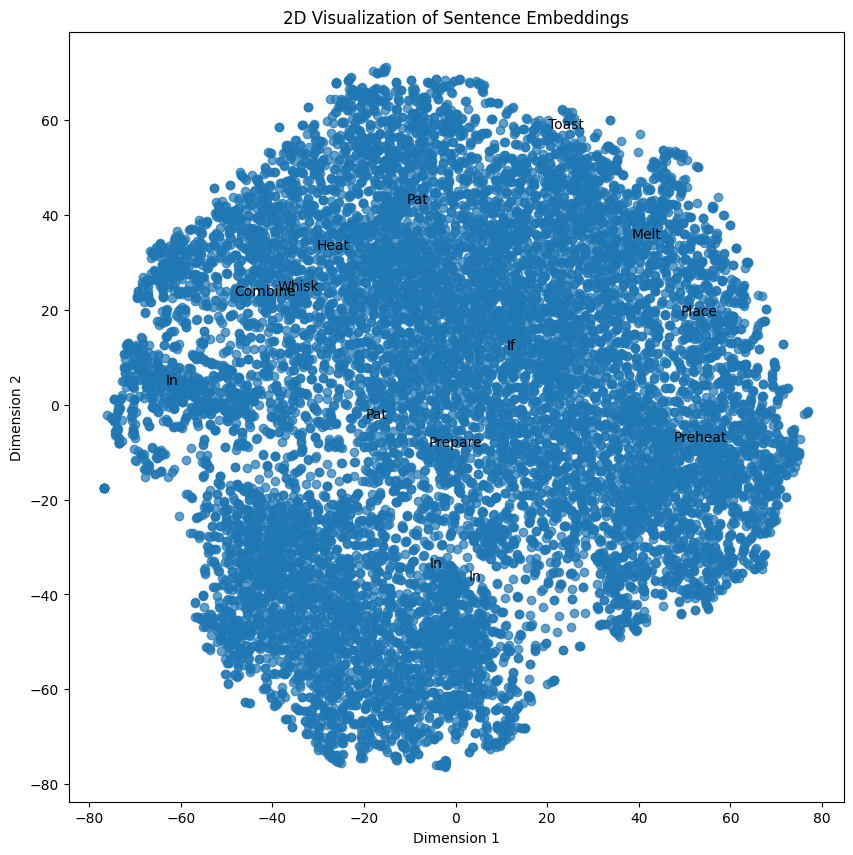

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)

# Optionally, annotate some points
for i, sentence in enumerate(sentences):
    if i % 1000 == 0:  # Label every 10th sentence for readability
        plt.annotate(sentence.split()[0], (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [6]:
data["Embedding"] = embeddings.tolist()
data.to_csv("../data/13k-recipes-embeddings.csv", index=False)

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

import pandas as pd

from tqdm import tqdm

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

data = pd.read_csv("../data/13k-recipes.csv")

sentences = data["Instructions"].tolist()
embeddingsn = []

model.eval()
with torch.no_grad():
    for sentence in sentences:
        # Ensure each input to the tokenizer is a single string
        inputs = tokenizer(str(sentence), return_tensors="pt", truncation=True, max_length=128)
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Mean pooling
        embeddingsn.append(embedding)

In [8]:
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Carregar o modelo e o tokenizador
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


# Geração dos embeddings com barra de progresso
embeddings = []
model.eval()
with torch.no_grad():
    for sentence in tqdm(sentences, desc="Generating embeddings"):
        inputs = tokenizer(str(sentence), return_tensors="pt", truncation=True, max_length=128)
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Mean pooling
        embeddings.append(embedding)

# Converter lista de embeddings para um array NumPy
embeddings = np.array(embeddings)

# Redução de dimensionalidade usando PCA antes do t-SNE
n_components = min(50, embeddings.shape[0], embeddings.shape[1])  # Define n_components dinamicamente
pca = PCA(n_components=n_components)
embeddings_pca = pca.fit_transform(embeddings)

# Configurar perplexidade para t-SNE com base no número de amostras
perplexity = min(30, len(embeddings_pca) - 1)  # Perplexidade deve ser menor que n_samples
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)

# Redução final para 2D com t-SNE
print("Running t-SNE for 2D visualization...")
embeddings_2d = tsne.fit_transform(embeddings_pca)

Generating embeddings: 100%|██████████| 13501/13501 [29:38<00:00,  7.59it/s]


Running t-SNE for 2D visualization...


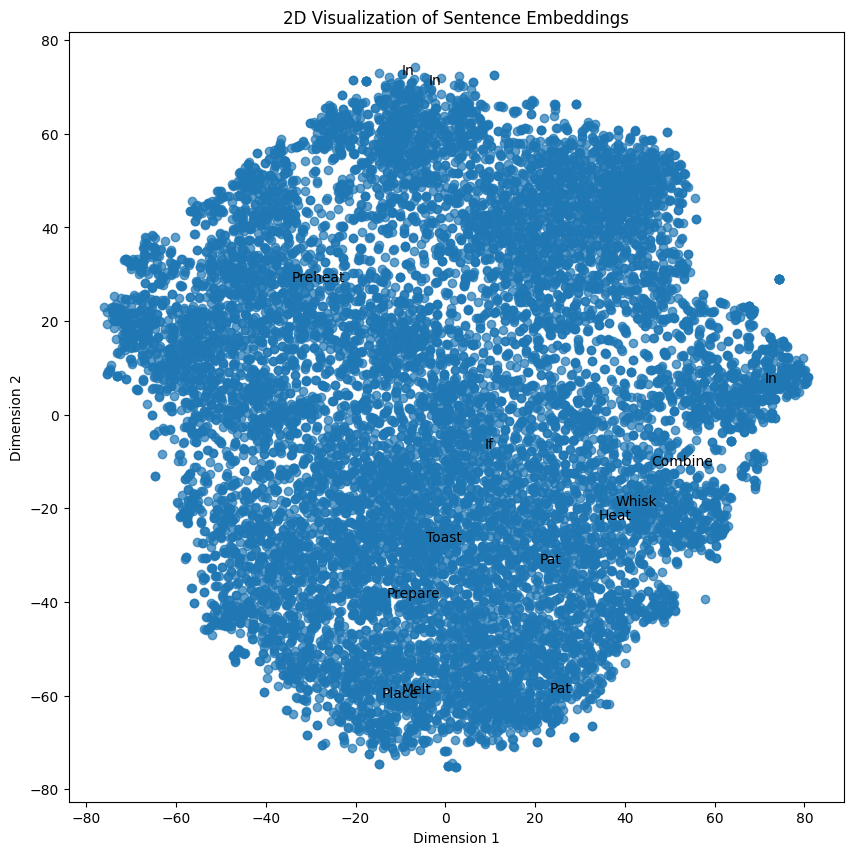

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)

# Optionally, annotate some points
for i, sentence in enumerate(sentences):
    if i % 1000 == 0:  # Label every 10th sentence for readability
        plt.annotate(sentence.split()[0], (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [11]:
data["BaseEmbedding"] = embeddings.tolist()

In [12]:
data.to_csv("../data/13k-recipes-embeddings.csv", index=False)